# Loan Delinquency Prediction

### Problem Statement: 

#### Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions.

####    Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.

####       Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)

### Solution: 
#### Notebook contains various machine learning models like K nearest neighbour, Logistic Regression ,Random Forest, Naive Bayes, XGBoost, AdaBoost, GradientBoost, Decision Tree which are trained on the training data which predicts the delinquency status of loans for the next month given the delinquency status for the previous 12 months.  Out of which  the f1-score of the Random Forest model out performs all other models so we are using the Random Forest classifier with Grid Searchoptimized hyper parameters using for the identification of the delinquency status. At the end we are writing the predicted values into a csv file.

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,f1_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Setting Basic Configuration for Visualisation

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

### Loading the DataSet

In [3]:
data_train= pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')
data_test_new=pd.read_csv('test.csv')

### Getting Information About the DataSet

In [4]:
data_train.columns
data_test.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'],
      dtype='object')

In [5]:
#train_data=data.drop('loan_id','financial_institution','origination_date','first_payment_date',)
print(data_train.m13.value_counts())


0    115422
1       636
Name: m13, dtype: int64


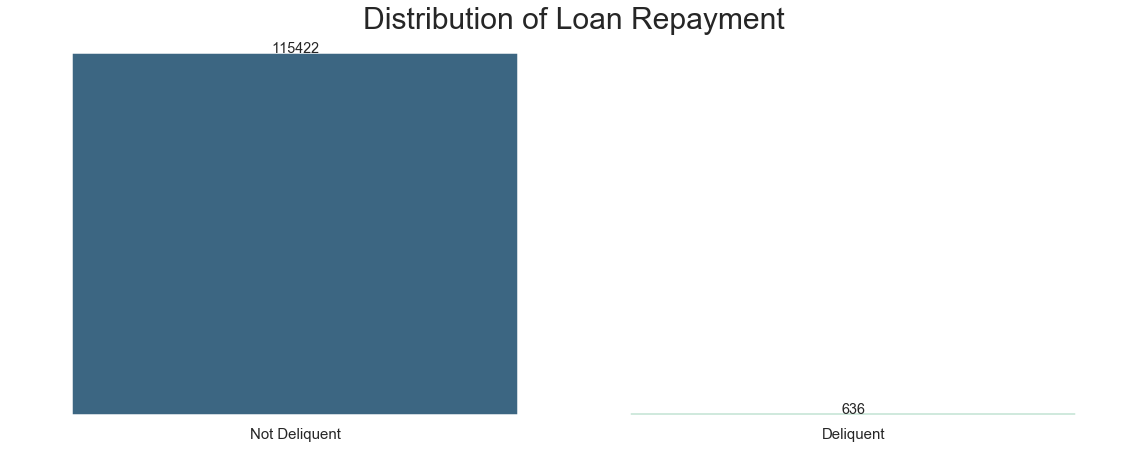

In [6]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(data_train.m13, palette='viridis')
g.set_xticklabels(['Not Deliquent', 'Deliquent'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Loan Repayment', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [7]:
data_train=data_train.drop(['loan_id','financial_institution','origination_date',
       'first_payment_date'], axis=1)  #Dropping ir-relevant columns

In [8]:
data_test=data_test.drop(['loan_id','financial_institution','origination_date',
       'first_payment_date'], axis=1)  #Dropping ir-relevant columns


In [9]:
columns_data=data_train.columns #Checking the columns of training dataset

In [10]:
data_train.info()     #Info. about the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 25 columns):
source                      116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                          116058 non-null int64
m3                          116058 non-null int64
m4                          116058 non-null int64
m5                          116058 non-null int64
m6                     

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 24 columns):
source                      35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3                          35866 non-null int64
m4                          35866 non-null int64
m5                          35866 non-null int64
m6                          35866 non-null int64
m7   

#### Missing Data Analysis

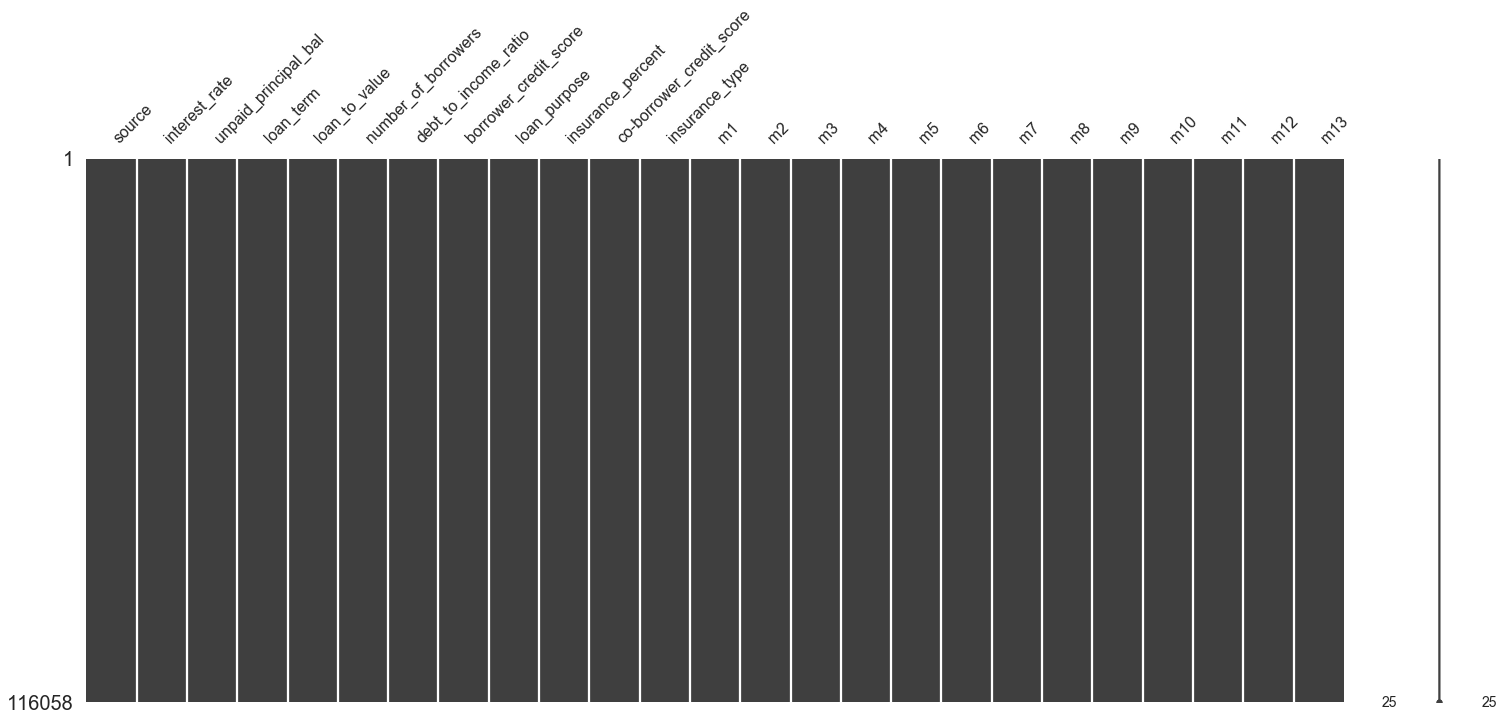

In [12]:
msno.matrix(data_train)  
#sns.heatmap(data_train.isnull(), cbar=False)

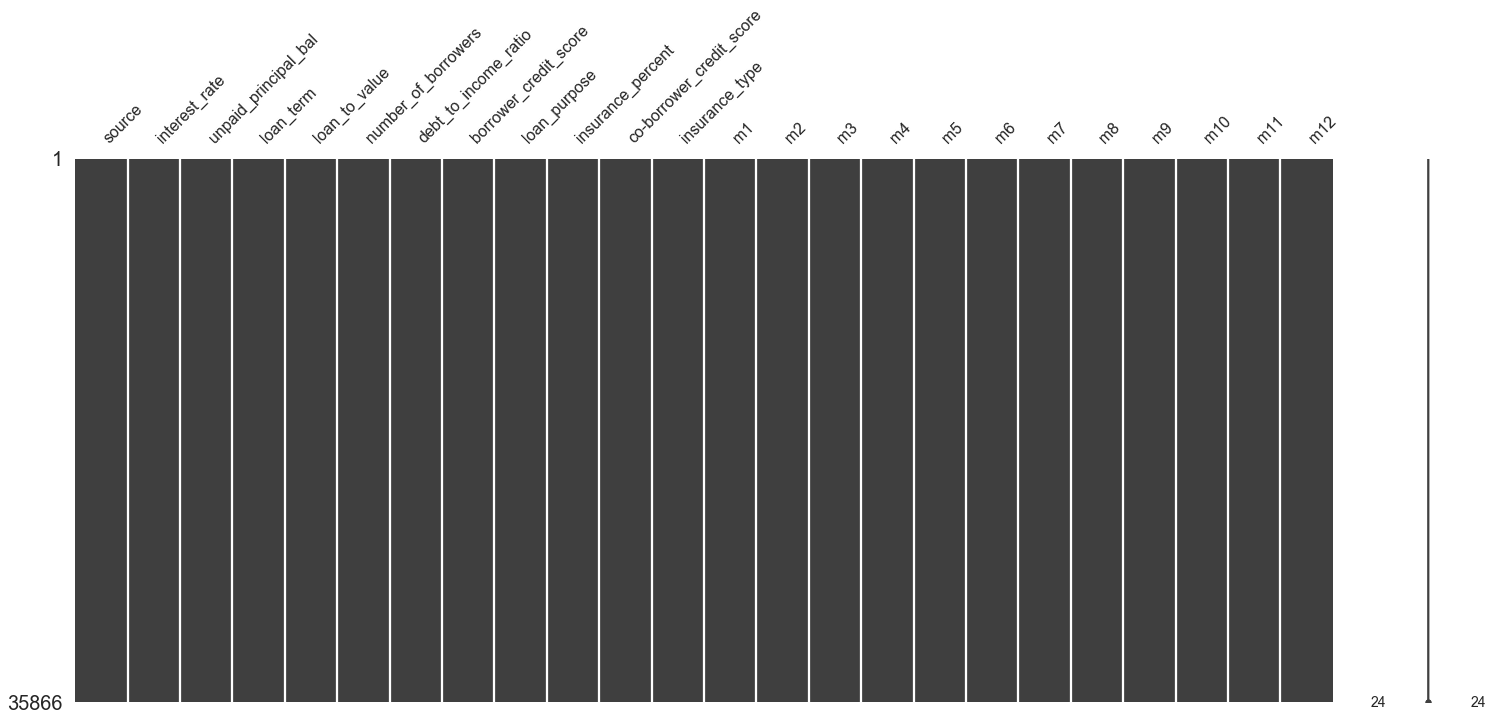

In [13]:
msno.matrix(data_test)

## Data Pre-Processing

#### Encoding the Categorical Data

In [14]:
encoded_data= pd.get_dummies(data_train['source'],prefix='source'+'_')
data_train=data_train.join(encoded_data)
data_train=data_train.drop(['source','loan_purpose'],axis=1)

In [15]:
encoded_data_test= pd.get_dummies(data_test['source'],prefix='source'+'_')
data_test=data_test.join(encoded_data_test)
data_test=data_test.drop(['source','loan_purpose'],axis=1)

In [16]:
data_train=data_train[['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'source__X', 'source__Y', 'source__Z', 'm13']]
#data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 26 columns):
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                          116058 non-null int64
m3                          116058 non-null int64
m4                          116058 non-null int64
m5                          116058 non-null int64
m6                          116058 non-null int64
m7                          116058 non-null int64
m8                       

In [17]:
#data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 25 columns):
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3                          35866 non-null int64
m4                          35866 non-null int64
m5                          35866 non-null int64
m6                          35866 non-null int64
m7                          35866 non-null int64
m8                          35866 non-null int64
m9     

#### Feature Scaling

In [18]:
np_data = data_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np_data)
data_scaled = pd.DataFrame(x_scaled)
df=data_scaled
#df
#data_scaled #print the scaled_data

In [19]:
np_data_test = data_test.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_test = min_max_scaler.fit_transform(np_data_test)
data_scaled_test = pd.DataFrame(x_scaled_test)
df_test=data_scaled_test
#df_test

#### X-Y Split

In [20]:
#df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.444444,0.170732,1.000000,0.978022,0.0,0.333333,0.826190,0.750,0.000000,0.0,...,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0
1,0.583333,0.111859,1.000000,0.725275,0.0,0.682540,0.829762,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.076923,0.000000,0.0,1.0,0.0,1.0
2,0.222222,0.298570,0.400000,0.472527,0.0,0.507937,0.928571,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0
3,0.555556,0.104289,1.000000,0.439560,1.0,0.682540,0.753571,0.000,0.763158,0.0,...,0.000000,0.0,0.090909,0.083333,0.076923,0.071429,1.0,0.0,0.0,1.0
4,0.555556,0.095038,1.000000,0.813187,0.0,0.666667,0.810714,0.000,0.000000,0.0,...,0.666667,0.7,0.727273,0.750000,0.769231,0.785714,1.0,0.0,0.0,1.0
5,0.472222,0.116905,1.000000,0.813187,0.0,0.714286,0.803571,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0
6,0.388889,0.040370,1.000000,0.978022,0.0,0.682540,0.860714,0.750,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
7,0.500000,0.259041,0.800000,0.615385,0.0,0.698413,0.776190,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0
8,0.388889,0.428091,1.000000,0.769231,0.0,0.539683,0.961905,0.000,0.000000,0.0,...,0.111111,0.0,0.090909,0.166667,0.000000,0.071429,1.0,0.0,0.0,1.0
9,0.388889,0.170732,1.000000,0.978022,1.0,0.634921,0.835714,0.750,0.837321,0.0,...,0.111111,0.1,0.090909,0.083333,0.153846,0.142857,1.0,0.0,0.0,1.0


In [21]:
y = df.iloc[:,-1:]      #Dependent variabl
#df=df.drop([df.columns[-1]],  axis='columns')
X = df.iloc[:,0:-1]   #Independent variable
#y

,25
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


#### Test Train Split

In [22]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,...,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000,87043.000000
mean,0.359752,0.166038,0.774007,0.675199,0.593270,0.472236,0.916595,0.070061,0.549903,0.003205,...,0.000383,0.000433,0.000453,0.000468,0.000531,0.000515,0.000541,0.550096,0.323794,0.126110
std,0.102600,0.096538,0.299299,0.190163,0.491227,0.154477,0.049999,0.203064,0.456871,0.056525,...,0.010152,0.010475,0.010360,0.010875,0.011692,0.011640,0.011772,0.497487,0.467925,0.331975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.091674,0.400000,0.560440,0.000000,0.349206,0.894048,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.361111,0.144659,1.000000,0.725275,1.000000,0.476190,0.929762,0.000000,0.885167,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.416667,0.224558,1.000000,0.813187,1.000000,0.603175,0.951190,0.000000,0.946172,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.972222,1.000000,1.000000,1.000000,1.000000,0.952381,1.000000,1.000000,1.000000,1.000000,...,0.875000,0.888889,0.900000,0.909091,0.916667,0.846154,0.785714,1.000000,1.000000,1.000000


## Training the Model(s)

#### Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state = 4)
classifier_logistic.fit(X_train, y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=4, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### K Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier(n_estimators=50)
classifier_RF.fit(X_train,y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Hyper Parameter Tuning using Grid Search

In [28]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80,100],
    'max_features': [2, 3],
    'n_estimators': [100,200, 1000]
}
rfc = RandomForestClassifier(random_state=42)

In [29]:
#grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid,cv = 2)
#grid_search.fit(X_train, y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 100], 'max_features': [2, 3], 'n_estimators': [100, 200, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
#optimized_parameters=grid_search.best_params_
#optimized_parameters

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'n_estimators': 1000}

In [31]:
classifier_Tuned_RF=RandomForestClassifier(n_estimators=1000, max_features=3,max_depth=80, bootstrap=True )
classifier_Tuned_RF.fit(X_train,y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### XgBoost

In [32]:
classifier_xgboost = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=1)
classifier_xgboost.fit(X_train, y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11:47:28] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 4 pruned nodes, max_depth=4
[11:47:28] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[11:47:28] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 2 pruned nodes, max_depth=4
[11:47:28] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 2 pruned nodes, max_depth=4
[11:47:28] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:47:28] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[11:47:29] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 prun

[11:47:31] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 4 pruned nodes, max_depth=4
[11:47:31] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 pruned nodes, max_depth=4
[11:47:31] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 2 pruned nodes, max_depth=4
[11:47:31] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 6 pruned nodes, max_depth=4
[11:47:32] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 2 pruned nodes, max_depth=4
[11:47:32] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 2 pruned nodes, max_depth=4
[11:47:32] d:\build\xgboost\xgboost-0.80.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 4 prun

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.8)

#### AdaBoost

In [33]:
classifier_adaboost = AdaBoostClassifier(n_estimators=100)
classifier_adaboost.fit(X_train, y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

#### Gradient Boost

In [34]:
classifier_gdboost = GradientBoostingClassifier(n_estimators=100)
classifier_gdboost.fit(X_train, y_train)

C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

#### Decision Tree

In [35]:
classifier_dtree = DecisionTreeClassifier()
classifier_dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Testing the Model(s)

In [36]:
y_pred_neighbour= classifier_knn.predict(X_test)
y_pred_Logistic = classifier_logistic.predict(X_test)
y_pred_NB=classifier_NB.predict(X_test)
y_pred_RF=classifier_RF.predict(X_test)
y_pred_xgboost=classifier_xgboost.predict(X_test)
y_pred_adaboost=classifier_adaboost.predict(X_test)
y_pred_gdboost=classifier_gdboost.predict(X_test)
y_pred_dtree=classifier_dtree.predict(X_test)
y_pred_opt_RF=classifier_Tuned_RF.predict(X_test)


C:\Users\Sjana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Prediction On the Test Data

In [37]:
y_pred_test=classifier_RF.predict(df_test)

In [38]:
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
y_pred_test=pd.DataFrame(y_pred_test,columns=['m13'])
#y_pred_test

In [40]:
df_new=data_test_new[['loan_id']]

In [41]:
predicted_data_test= pd.concat([df_new,y_pred_test],axis=1)
#predicted_data_test

In [42]:
predicted_data_test.to_csv('D:\\prediction_output.csv')

## Performance Metrics 

#### Confusion Matrix

In [43]:
cm_knn = confusion_matrix(y_test, y_pred_neighbour)
cm_knn

array([[28852,     3],
       [  133,    27]], dtype=int64)

In [44]:
cm_logistic = confusion_matrix(y_test, y_pred_Logistic)
cm_logistic

array([[28847,     8],
       [  130,    30]], dtype=int64)

In [45]:
cm_NB = confusion_matrix(y_test, y_pred_NB)
cm_NB

array([[28343,   512],
       [   56,   104]], dtype=int64)

In [46]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_RF

array([[28846,     9],
       [   98,    62]], dtype=int64)

In [47]:
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
cm_xgboost

array([[28850,     5],
       [  117,    43]], dtype=int64)

In [48]:
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cm_adaboost

array([[28840,    15],
       [   99,    61]], dtype=int64)

In [49]:
cm_gdboost = confusion_matrix(y_test, y_pred_gdboost)
cm_gdboost

array([[28839,    16],
       [  103,    57]], dtype=int64)

In [50]:
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
cm_dtree

array([[28684,   171],
       [   99,    61]], dtype=int64)

In [51]:
cm_opt_RF = confusion_matrix(y_test, y_pred_opt_RF)
cm_opt_RF

array([[28848,     7],
       [  102,    58]], dtype=int64)

#### F1-Score 

In [52]:
f1_score_knn=f1_score(y_test, y_pred_neighbour, average="macro")
f1_score_knn

0.6409296061731091

In [53]:
f1_score_logistic=f1_score(y_test, y_pred_Logistic, average="macro")
f1_score_logistic

0.6503220404347807

In [54]:
f1_score_NB=f1_score(y_test, y_pred_NB, average="macro")
f1_score_NB

0.629060266441565

In [55]:
f1_score_RF=f1_score(y_test, y_pred_RF, average="macro")
f1_score_RF

0.7674726468477225

In [56]:
f1_score_xgboost=f1_score(y_test, y_pred_xgboost, average="macro")
f1_score_xgboost

0.7056758074515157

In [57]:
f1_score_adaboost=f1_score(y_test, y_pred_adaboost, average="macro")
f1_score_adaboost

0.7574883147215445

In [58]:
f1_score_gdboost=f1_score(y_test, y_pred_gdboost, average="macro")
f1_score_gdboost

0.7436057279358916

In [59]:
f1_score_dtree=f1_score(y_test, y_pred_dtree, average="macro")
f1_score_dtree

0.6532700401025118

In [60]:
f1_score_opt_RF=f1_score(y_test, y_pred_opt_RF, average="macro")
f1_score_opt_RF

0.7568349527626407